>#### Se importan las librerias que se utilizaran durante el analisis de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>#### Se guardan los datos en la variable _df_

In [2]:
df = pd.read_csv('Inmuebles_Disponibles_Para_La_Venta.csv')

>#### Visualizamos la forma de los datos de analisis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Codigo                  448 non-null    int64 
 1   Ciudad                  448 non-null    object
 2   Departamento            448 non-null    object
 3   Barrio                  59 non-null     object
 4   Direccion               448 non-null    object
 5   Area Terreno            448 non-null    int64 
 6   Area Construida         448 non-null    int64 
 7   Detalle Disponibilidad  448 non-null    object
 8   Estrato                 448 non-null    object
 9   Precio                  448 non-null    int64 
 10  Tipo de Inmueble        448 non-null    object
 11  Datos Adicionales       77 non-null     object
dtypes: int64(4), object(8)
memory usage: 42.1+ KB


>### Ordenar los datos
>#### Primero se verifican registros nulos

In [4]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    389
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         371
dtype: int64

>#### Se eliminan las columnas _Barrio_ y _Datos Adicionales_ puesto que contienen registros nulos y su ausencia no afectara el analisis de datos puesto que la informacion del _Barrio_ puede ser reemplazada por la direccion del predio y los _Datos Adicionales_ son comentarios sobre el imbueble

In [5]:
df = df.drop(columns=['Barrio', 'Datos Adicionales'])

>#### Se visualiza la tabla para verificar que otra columna se puede eliminar antes de iniciar el estudio

In [6]:
df

,Codigo,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble
0,2330,BOGOTA,CUNDINAMARCA,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,134280960000000,LOTE VIVIENDA
1,2363,BOGOTA,CUNDINAMARCA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,32857503970000,LOTE COMERCIAL
2,2575,SOGAMOSO,BOYACÁ,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,147133144000000,CLINICA
3,2669,LA CALERA,CUNDINAMARCA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,5520000000000,LOTE VIVIENDA
4,4408,BOGOTA,CUNDINAMARCA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,138038206000000,LOTE VIVIENDA
...,...,...,...,...,...,...,...,...,...,...
443,19304,BOGOTA,CUNDINAMARCA,Av. 15 No. 127 B 78 Apto. 1201 - Edificio Mira...,0,0,COMERCIALIZABLE TERCEROS,SEIS,20426879879800,APARTAMENTO
444,19330,BOGOTA,CUNDINAMARCA,KR 100 17A 41 LC 334,0,0,COMERCIALIZABLE CON RESTRICCION,TRES,303688000000,LOCAL
445,19331,VILLAVICENCIO,META,Calle 34 No. 41 - 31,0,0,COMERCIALIZABLE VENTA ANTICIPADA,CINCO,10400137300000,CASA
446,19339,TARAZA,ANTIOQUIA,CALLE 47B N° 27 - 25 APARTAMENTO 201 BLOQUE 3,0,0,COMERCIALIZABLE TERCEROS,DOS,807621000000,APARTAMENTO


>#### Se elimina la columna _Codigo_ puesto que representa una identificacion del predio y esta se puede reemplazar por el indice de la tabla

In [7]:
df = df.drop(columns=['Codigo'])

>#### Se verifican los valores maximos y minimos del contenido de la tabla

In [8]:
df.describe()

,Area Terreno,Area Construida,Precio
count,4.480000e+02,4.480000e+02,4.480000e+02
mean,1.619546e+06,1.155153e+04,9.372906e+12
std,1.858858e+07,1.285177e+05,3.817964e+13
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.257250e+11
50%,0.000000e+00,0.000000e+00,1.652050e+11
75%,0.000000e+00,0.000000e+00,1.861440e+12
max,3.217197e+08,2.272400e+06,4.523379e+14


>#### Se divide la columna _Precio_ por mil millones (1000x10^6), puesto que el valor maximo es 452 Billones (452x10^12) y de esta forma se facilitara su manejo

In [9]:
df.Precio = (df.Precio/1_000_000_000)

>#### Se cambia el contenido de la columna _Estrato_ para que sea una variable **Numérica**

In [10]:
df.Estrato.unique()

array(['TRES', 'COMERCIAL', 'RURAL', 'DOS', 'INDUSTRIAL', 'CUATRO',
       'CINCO', 'UNO', 'SEIS'], dtype=object)

>#### Se agregan los estratos **7**, **8** y **9** para abarcar la categoria **COMERCIAL**, **RURAL** e **INDUSTRIAL** respectivamente

In [11]:
reemplazo = {'UNO': 1,
      'DOS': 2,
      'TRES': 3,
      'CUATRO': 4,
      'CINCO': 5,
      'SEIS': 6,
      'COMERCIAL': 7,
      'RURAL': 8,
      'INDUSTRIAL': 9,
     }
df.Estrato = df.apply(lambda row: reemplazo[row.Estrato], axis = 1)
df

,Ciudad,Departamento,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble
0,BOGOTA,CUNDINAMARCA,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,3,134280.96000,LOTE VIVIENDA
1,BOGOTA,CUNDINAMARCA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,3,32857.50397,LOTE COMERCIAL
2,SOGAMOSO,BOYACÁ,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,7,147133.14400,CLINICA
3,LA CALERA,CUNDINAMARCA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,8,5520.00000,LOTE VIVIENDA
4,BOGOTA,CUNDINAMARCA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,7,138038.20600,LOTE VIVIENDA
...,...,...,...,...,...,...,...,...,...
443,BOGOTA,CUNDINAMARCA,Av. 15 No. 127 B 78 Apto. 1201 - Edificio Mira...,0,0,COMERCIALIZABLE TERCEROS,6,20426.87988,APARTAMENTO
444,BOGOTA,CUNDINAMARCA,KR 100 17A 41 LC 334,0,0,COMERCIALIZABLE CON RESTRICCION,3,303.68800,LOCAL
445,VILLAVICENCIO,META,Calle 34 No. 41 - 31,0,0,COMERCIALIZABLE VENTA ANTICIPADA,5,10400.13730,CASA
446,TARAZA,ANTIOQUIA,CALLE 47B N° 27 - 25 APARTAMENTO 201 BLOQUE 3,0,0,COMERCIALIZABLE TERCEROS,2,807.62100,APARTAMENTO


>#### Se verifica si existes registros duplicados

In [12]:
df.duplicated(subset=['Ciudad','Departamento','Direccion','Precio']).sum()

13

>#### Se eliminan los registros duplicados

In [13]:
df = df.drop_duplicates(subset=['Ciudad','Departamento','Direccion','Precio'])

>#### Busqueda de datos erroneos
>#### Se verifica que en las columnas _Area Terreno_ y _Area Construida_ no existan valores negativos

In [14]:
df.index[df['Area Terreno'] < 0].any()

False

In [15]:
df.index[df['Area Construida'] < 0].any()

False

>#### Se verifica que en la columna _Precio_ no existan valores negativos o iguales a 0

In [ ]:
df.index[df.Precio <= 0].any()

>#### Puesto a que existen registros con valores negativos o iguales a 0 en la columna _Precio_ se buscan sus indices para decidir si se eliminan

In [16]:
df.index[df.Precio <= 0]

Index([383], dtype='int64')

>#### Debido a que solo es un registro se elimina del data frame

In [17]:
df = df.drop(index=383)

>#### Verificamos que todas las columnas poseen el mismo numero de registros (columnas)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 447
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ciudad                  434 non-null    object 
 1   Departamento            434 non-null    object 
 2   Direccion               434 non-null    object 
 3   Area Terreno            434 non-null    int64  
 4   Area Construida         434 non-null    int64  
 5   Detalle Disponibilidad  434 non-null    object 
 6   Estrato                 434 non-null    int64  
 7   Precio                  434 non-null    float64
 8   Tipo de Inmueble        434 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 33.9+ KB


>#### Con los datos ya preparados se inicia el analisis

>#### Se realiza el calculo de la relacion Precio/Area tanto para el Area del terreno como para el Area Construida, puesto a que el precio es la variable de estudio y esta relacion permite identificar predios que representan una buena oferta

In [19]:
#df['$/m2 Terreno'] = (df['Precio']/df['Area Terreno'])
df['$/m2 Terreno'] = df.apply(lambda row: row.Precio / row['Area Terreno'] if row['Area Terreno'] > 0 else None, axis=1)

In [20]:
#df['$/m2 Construido'] = (df['Precio']/df['Area Construida'])
df['$/m2 Construido'] = df.apply(lambda row: row.Precio / row['Area Construida'] if row['Area Construida'] > 0 else None, axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 447
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ciudad                  434 non-null    object 
 1   Departamento            434 non-null    object 
 2   Direccion               434 non-null    object 
 3   Area Terreno            434 non-null    int64  
 4   Area Construida         434 non-null    int64  
 5   Detalle Disponibilidad  434 non-null    object 
 6   Estrato                 434 non-null    int64  
 7   Precio                  434 non-null    float64
 8   Tipo de Inmueble        434 non-null    object 
 9   $/m2 Terreno            24 non-null     float64
 10  $/m2 Construido         10 non-null     float64
dtypes: float64(3), int64(3), object(5)
memory usage: 40.7+ KB


>#### Como se observa en la tabla anterior solo 24 Registros en la columna _$/m2 Terreno_ y solo 10 en la columna _$/m2 Construido_ poseen informacion, debido a la falta de valores de Area

>### Reporte Estadistico

In [22]:
df.describe()

,Area Terreno,Area Construida,Estrato,Precio,$/m2 Terreno,$/m2 Construido
count,4.340000e+02,4.340000e+02,434.000000,434.000000,24.000000,10.000000
mean,1.671790e+06,1.192416e+04,6.417051,9156.231148,0.069339,0.309999
std,1.888438e+07,1.305618e+05,1.625088,38048.146060,0.187200,0.279777
min,0.000000e+00,0.000000e+00,1.000000,65.990400,0.000110,0.045948
25%,0.000000e+00,0.000000e+00,7.000000,125.725000,0.001584,0.161502
50%,0.000000e+00,0.000000e+00,7.000000,165.205000,0.002201,0.202405
75%,0.000000e+00,0.000000e+00,7.000000,1503.452625,0.029177,0.388126
max,3.217197e+08,2.272400e+06,9.000000,452337.898200,0.888979,0.994300


>#### Se crea un grafico de caja de _Precio vs Departamento_, _Precio vs Estrato_ y _Precio vs Tipo de Inmueble_ en los cuales se pueden visualizar valores atipicos representados por los circulos

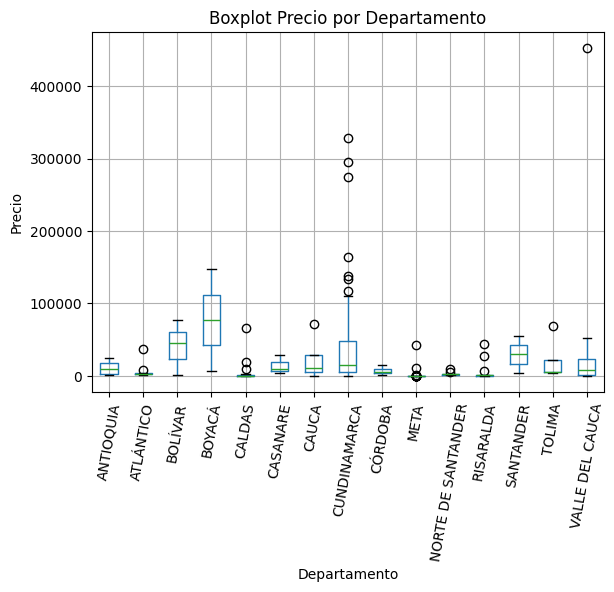

In [23]:
df.boxplot('Precio', by='Departamento');
plt.xticks(rotation=80);
plt.ylabel('Precio');
plt.title('Boxplot Precio por Departamento');
plt.suptitle('');

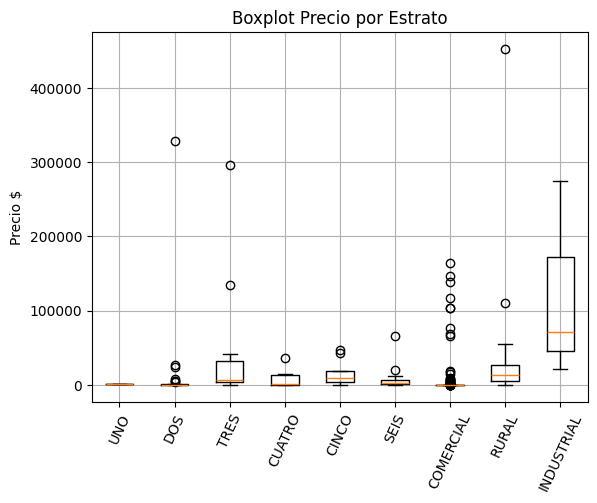

In [24]:
label = ['UNO','DOS','TRES','CUATRO','CINCO','SEIS','COMERCIAL','RURAL','INDUSTRIAL']
plt.boxplot([df[df.Estrato == 1].Precio,
            df[df.Estrato == 2].Precio,
            df[df.Estrato == 3].Precio,
            df[df.Estrato == 4].Precio,
            df[df.Estrato == 5].Precio,
            df[df.Estrato == 6].Precio,
            df[df.Estrato == 7].Precio,
            df[df.Estrato == 8].Precio,
            df[df.Estrato == 9].Precio],
            labels =label)
plt.xticks(rotation=65)
plt.ylabel('Precio $')
plt.title('Boxplot Precio por Estrato')
plt.suptitle('')
plt.grid()


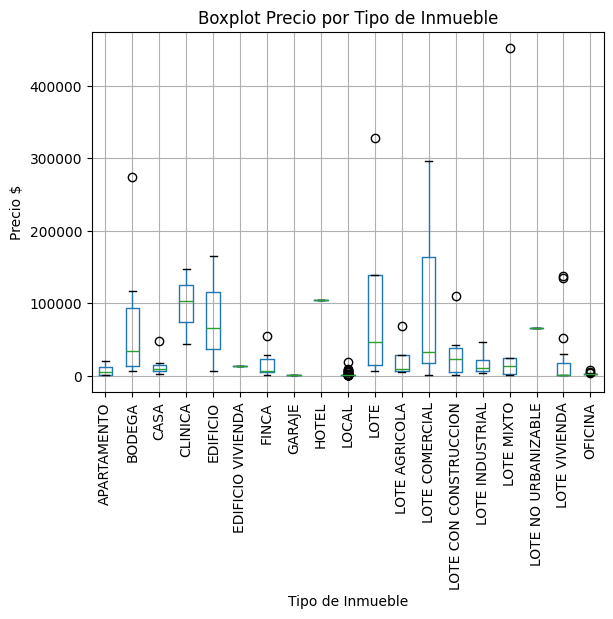

In [25]:
df.boxplot('Precio', by='Tipo de Inmueble');
plt.xticks(rotation=90);
plt.ylabel('Precio $');
plt.title('Boxplot Precio por Tipo de Inmueble');
plt.suptitle('');

>#### Se grafica la correlacion entre las variables

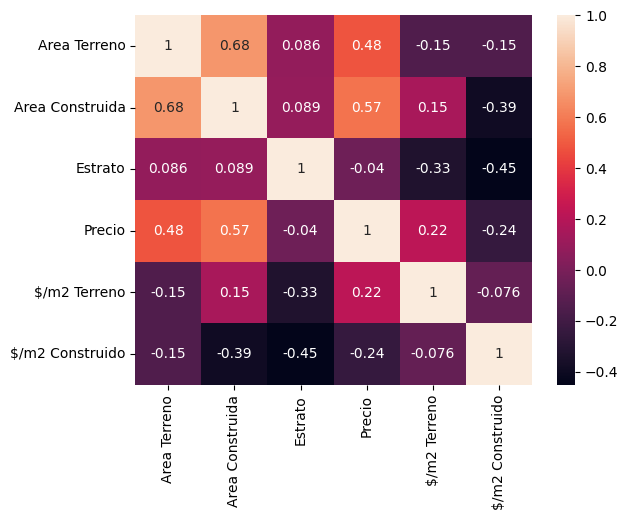

In [26]:
correlacion = df.corr(numeric_only=True)
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True);

>#### Se grafica el histograma de frecuencia de Departamentos, Disponibilidad y Estrato

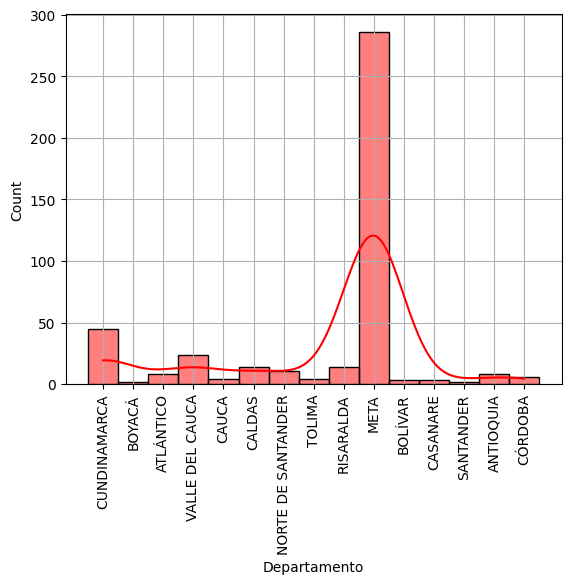

In [27]:
sns.histplot(df.Departamento, color="r", kde=True);
plt.xticks(rotation=90);
plt.grid()

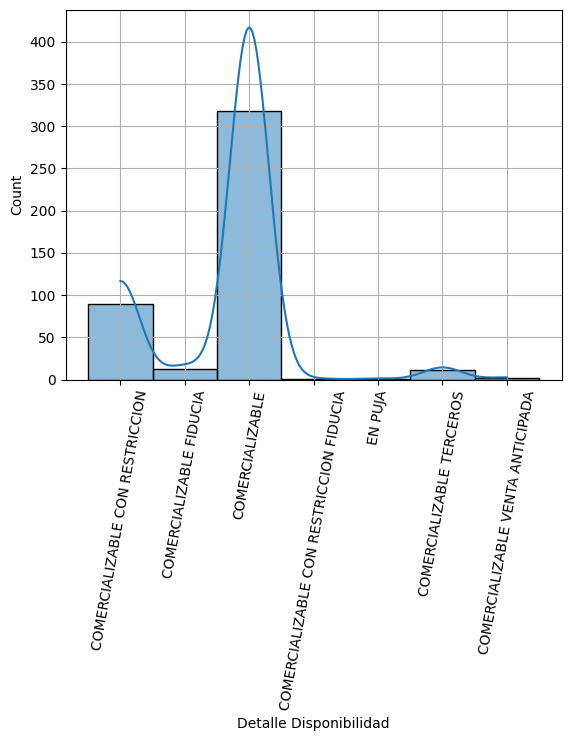

In [28]:
sns.histplot(df['Detalle Disponibilidad'], kde=True);
plt.xticks(rotation=80);
plt.grid()

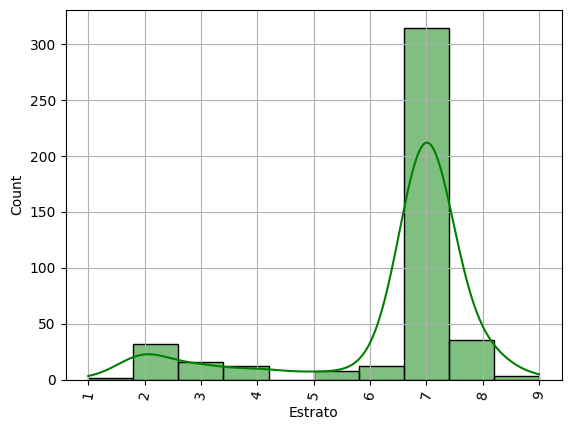

In [29]:
sns.histplot(df.Estrato, color='g', kde=True);
plt.xticks(rotation=80);
plt.grid()

>#### Se crea el grafico de dispersión de _Precio vs Departamento_ y _Precio vs Tipo de Inmueble_ teniendo en cuenta el Estrato

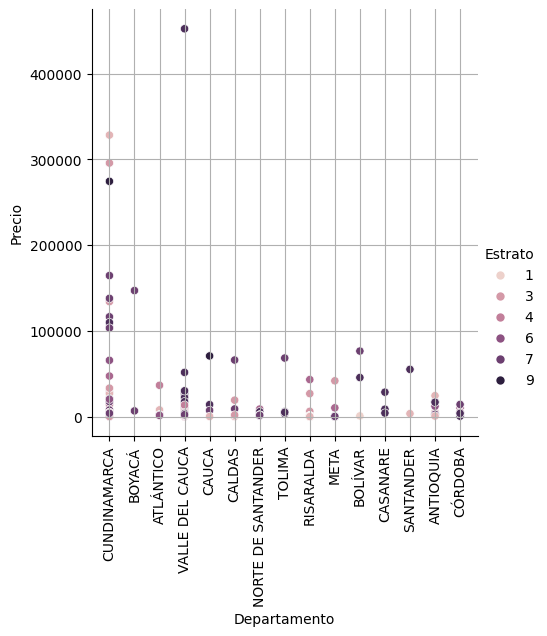

In [30]:
sns.relplot(x='Departamento', y='Precio', hue='Estrato', data=df)
plt.xticks(rotation=90);
plt.grid()

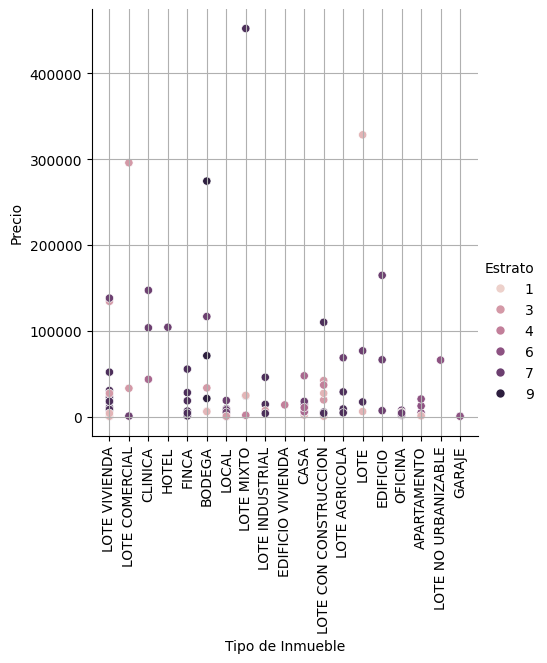

In [31]:
sns.relplot(x='Tipo de Inmueble', y='Precio', hue='Estrato', data=df);
plt.xticks(rotation=90);
plt.grid()

>### Del Reporte estadistico se puede identificar los cuartiles en los que se divide el precio, por lo tanto se procede a agrupar el valor del Inmueble en los siguientes rangos

In [32]:
df['Precio'].describe()

count       434.000000
mean       9156.231148
std       38048.146060
min          65.990400
25%         125.725000
50%         165.205000
75%        1503.452625
max      452337.898200
Name: Precio, dtype: float64

In [33]:
rangos = [0,100,200,100_000,500_000]
nombre_rango = ['0-99 (miles de M)','100-199 (miles de M)','200-99.000 (miles de M)','100.000-500.000 (miles de M)']
df['Rango Precio'] = pd.cut(df.Precio, rangos, labels=nombre_rango)
rango_precio = df['Rango Precio'].groupby(df['Rango Precio'], observed=True).count()

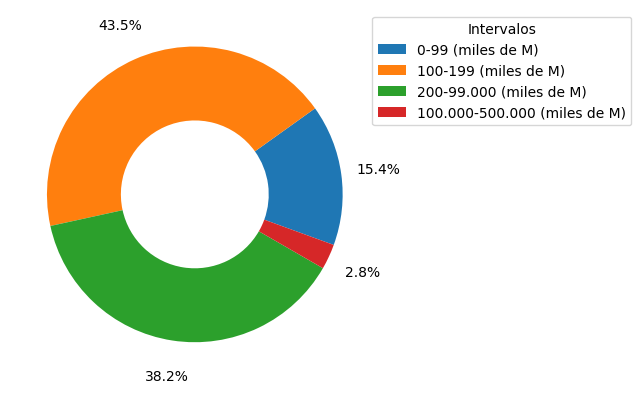

In [34]:
plt.pie(rango_precio, wedgeprops=dict(width=0.5), startangle=-20, autopct='%1.1f%%', pctdistance=1.25)
plt.legend(nombre_rango, title='Intervalos', loc='upper right', bbox_to_anchor=(0.8, 0, 0.9, 1))

>### Conclusiones
>1. La distribución de Precio se ubica en su mayoría en el intervalo de 100-199 miles de millones con un 43.5% de los datos
>2. La gran mayoría de los predios (más de 300) se encuentran en la categoría de comercializable, así como en el estrato COMERCIAL
>3. El Precio se ve más influenciado por el Área Construida que por el Área de Terreno, así como su relación con respecto al estrato del Predio es despreciable.
>4. No se puede realizar un análisis 100% concluyente debido a la ausencia del Área, lo cual dificulta la selección de la mejor ciudad por precio de m2